In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
from datetime import datetime
from matplotlib.pyplot import figure
%matplotlib inline

# to supress warnings
import warnings
warnings.filterwarnings('ignore')

In [68]:
file1 = 'chase 1.csv'
file2 = 'chase 2.csv'
file3 = 'capital 1 1.csv'
file4 = 'capital 1 2.csv'
file5 = 'capital 2 1.csv'
file6 = 'capital 2 2.csv'

In [69]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)
df6 = pd.read_csv(file6)

### Data Cleaning

In [70]:
df1.head()

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo
0,05/04/2023,05/05/2023,AMZN Mktp US*F59IE9BP3,Shopping,Sale,-18.46,NaN
1,05/05/2023,05/05/2023,Amazon.com*2M1K12J73,Shopping,Sale,-26.74,NaN
2,05/03/2023,05/04/2023,AMZN Mktp US*V67B54TC3,Shopping,Sale,-11.75,NaN
3,05/02/2023,05/03/2023,AMZN Mktp US*HM9ZC9HW1,Shopping,Sale,-8.36,NaN
4,05/02/2023,05/03/2023,AMZN Mktp US*HM8TG1532,Shopping,Sale,-6.48,NaN


In [71]:
df2.head()

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo
0,04/17/2023,04/17/2023,COMCAST CABLE COMM,Bills & Utilities,Sale,-55.00,NaN
1,04/09/2023,04/09/2023,Payment Thank You-Mobile,NaN,Payment,234.07,NaN
2,03/29/2023,03/29/2023,Payment Thank You-Mobile,NaN,Payment,400.00,NaN
3,03/27/2023,03/27/2023,LEMONADE INSURANCE,Bills & Utilities,Sale,-333.68,NaN
4,03/17/2023,03/17/2023,COMCAST CABLE COMM,Bills & Utilities,Sale,-55.00,NaN


In [72]:
df3.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit
0,5/7/2022,5/7/2022,LYFT *1 RIDE 05-06,Other Travel,63.69,NaN
1,5/4/2022,5/5/2022,CVS/PHARMACY #04103,Health Care,18.94,NaN
2,5/4/2022,5/5/2022,KUHN'S BELLEVUE,Merchandise,26.41,NaN
3,5/4/2022,5/5/2022,AMZN Mktp US*136FN59P1,Merchandise,17.99,NaN
4,5/4/2022,5/5/2022,AMZN Mktp US*1Q00T9U82,Merchandise,50.98,NaN


In [73]:
df4.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit
0,5/1/2023,5/1/2023,EARTHBREEZE.COM,Other Services,13.07,NaN
1,4/27/2023,4/28/2023,PUBLIX #1061,Merchandise,20.27,NaN
2,4/28/2023,4/28/2023,TMOBILE*PREPD AUTOPY,Phone/Cable,28.40,NaN
3,4/26/2023,4/27/2023,PUBLIX #1061,Merchandise,23.39,NaN
4,4/25/2023,4/26/2023,PUBLIX #1061,Merchandise,18.00,NaN


In [74]:
df5.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit
0,4/21/2023,5/5/2023,UBER ONE STMT CRED 8690,Other Travel,NaN,9.99
1,5/4/2023,5/4/2023,CAPITAL ONE MOBILE PYMT,Payment/Credit,NaN,75.04
2,4/21/2023,5/4/2023,UBER ONE STMT CRED 8690,Other Travel,NaN,9.99
3,5/1/2023,5/2/2023,ACTIV N FIT,Other,28.0,NaN
4,4/27/2023,4/28/2023,TM *GIMME GIMME DISCO-,Entertainment,23.6,NaN


In [75]:
df6.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit
0,5/5/2022,5/6/2022,FAMILY DOLLAR #5518,Merchandise,4.28,NaN
1,5/4/2022,5/4/2022,CAPITAL ONE MOBILE PYMT,Payment/Credit,NaN,64.21
2,4/16/2022,4/18/2022,MASABI_PAACREADY2RIDE,Other Travel,2.75,NaN
3,4/14/2022,4/15/2022,KUHN'S BELLEVUE,Merchandise,16.71,NaN
4,4/13/2022,4/15/2022,BNYGRANTSTCAFE QPS,Dining,1.87,NaN


In [76]:
# Ensure date format is correct
df1['Transaction Date'] = df1['Transaction Date'].str.replace('/','-')

In [77]:
df1['Post Date'] = df1['Post Date'].str.replace('/','-')

In [78]:
df1['Debit'] = df1.apply(lambda x: round(float(x['Amount']),2) if '-' not in str(x['Amount']) else float(0.00), axis=1)

In [79]:
df1['Credit'] = df1.apply(lambda x: round(float(str(x['Amount'])[1:]),2) if '-' in str(x['Amount']) else float(0.00), axis=1)

In [80]:
df1 = df1.drop(['Memo','Amount','Type'],axis=1)

In [81]:
df1.rename(columns={'Post Date':'Posted Date'},inplace=True)

In [82]:
df1.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit
0,05-04-2023,05-05-2023,AMZN Mktp US*F59IE9BP3,Shopping,0.0,18.46
1,05-05-2023,05-05-2023,Amazon.com*2M1K12J73,Shopping,0.0,26.74
2,05-03-2023,05-04-2023,AMZN Mktp US*V67B54TC3,Shopping,0.0,11.75
3,05-02-2023,05-03-2023,AMZN Mktp US*HM9ZC9HW1,Shopping,0.0,8.36
4,05-02-2023,05-03-2023,AMZN Mktp US*HM8TG1532,Shopping,0.0,6.48


In [83]:
df2['Transaction Date'] = df2['Transaction Date'].str.replace('/','-')

In [84]:
df2['Post Date'] = df2['Post Date'].str.replace('/','-')

In [85]:
df2['Debit'] = df2.apply(lambda x: round(float(x['Amount']),2) if '-' not in str(x['Amount']) else float(0.00), axis=1)

In [86]:
df2['Credit'] = df2.apply(lambda x: round(float(str(x['Amount'])[1:]),2) if '-' in str(x['Amount']) else float(0.00), axis=1)

In [87]:
df2 = df2.drop(['Memo','Amount','Type'],axis=1)

In [88]:
df2.rename(columns={'Post Date':'Posted Date'},inplace=True)

In [89]:
df2.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit
0,04-17-2023,04-17-2023,COMCAST CABLE COMM,Bills & Utilities,0.00,55.00
1,04-09-2023,04-09-2023,Payment Thank You-Mobile,NaN,234.07,0.00
2,03-29-2023,03-29-2023,Payment Thank You-Mobile,NaN,400.00,0.00
3,03-27-2023,03-27-2023,LEMONADE INSURANCE,Bills & Utilities,0.00,333.68
4,03-17-2023,03-17-2023,COMCAST CABLE COMM,Bills & Utilities,0.00,55.00


In [90]:
df3['Debit'] = df3['Debit'].fillna(float(0.00))

In [91]:
df3['Credit'] = df3['Credit'].fillna(float(0.00))

In [92]:
df4['Debit'] = df4['Debit'].fillna(float(0.00))

In [93]:
df4['Credit'] = df4['Credit'].fillna(float(0.00))

In [94]:
df5['Debit'] = df5['Debit'].fillna(float(0.00))

In [95]:
df5['Credit'] = df5['Credit'].fillna(float(0.00))

In [96]:
df6['Debit'] = df6['Debit'].fillna(float(0.00))

In [97]:
df6['Credit'] = df6['Credit'].fillna(float(0.00))

In [98]:
print(f"df3['Debit'] has {df3['Debit'].isna().sum()} NAN values")
print(f"df3['Credit'] has {df3['Credit'].isna().sum()} NAN values")
print(f"df4['Debit'] has {df4['Debit'].isna().sum()} NAN values")
print(f"df4['Credit'] has {df4['Credit'].isna().sum()} NAN values")
print(f"df5['Debit'] has {df5['Debit'].isna().sum()} NAN values")
print(f"df5['Credit'] has {df5['Credit'].isna().sum()} NAN values")
print(f"df6['Debit'] has {df6['Debit'].isna().sum()} NAN values")
print(f"df6['Credit'] has {df6['Credit'].isna().sum()} NAN values")

df3['Debit'] has 0 NAN values
df3['Credit'] has 0 NAN values
df4['Debit'] has 0 NAN values
df4['Credit'] has 0 NAN values
df5['Debit'] has 0 NAN values
df5['Credit'] has 0 NAN values
df6['Debit'] has 0 NAN values
df6['Credit'] has 0 NAN values


In [99]:
concat_data = pd.concat([df1,df2,df3,df4,df5,df6],axis=0)

In [100]:
concat_data.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit
0,05-04-2023,05-05-2023,AMZN Mktp US*F59IE9BP3,Shopping,0.0,18.46
1,05-05-2023,05-05-2023,Amazon.com*2M1K12J73,Shopping,0.0,26.74
2,05-03-2023,05-04-2023,AMZN Mktp US*V67B54TC3,Shopping,0.0,11.75
3,05-02-2023,05-03-2023,AMZN Mktp US*HM9ZC9HW1,Shopping,0.0,8.36
4,05-02-2023,05-03-2023,AMZN Mktp US*HM8TG1532,Shopping,0.0,6.48


In [101]:
concat_data.shape

(1847, 6)

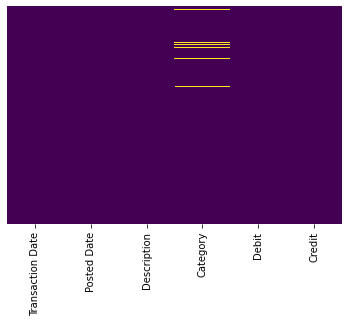

In [102]:
sns.heatmap(concat_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [103]:
concat_data['Category'].unique()

array(['Shopping', nan, 'Personal', 'Groceries', 'Food & Drink',
       'Health & Wellness', 'Travel', 'Bills & Utilities',
       'Professional Services', 'Entertainment', 'Gas',
       'Gifts & Donations', 'Home', 'Other Travel', 'Health Care',
       'Merchandise', 'Phone/Cable', 'Lodging', 'Payment/Credit',
       'Dining', 'Other Services', 'Gas/Automotive', 'Other', 'Airfare',
       'Insurance', 'Internet', 'Utilities'], dtype=object)

In [104]:
concat_data['Category'].fillna('Other',inplace=True)

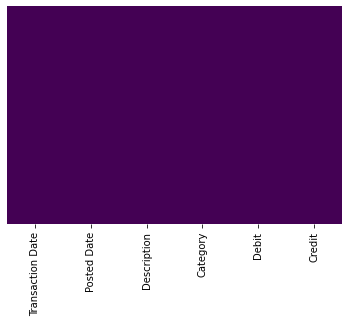

In [105]:
sns.heatmap(concat_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [106]:
concat_data.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit
0,05-04-2023,05-05-2023,AMZN Mktp US*F59IE9BP3,Shopping,0.0,18.46
1,05-05-2023,05-05-2023,Amazon.com*2M1K12J73,Shopping,0.0,26.74
2,05-03-2023,05-04-2023,AMZN Mktp US*V67B54TC3,Shopping,0.0,11.75
3,05-02-2023,05-03-2023,AMZN Mktp US*HM9ZC9HW1,Shopping,0.0,8.36
4,05-02-2023,05-03-2023,AMZN Mktp US*HM8TG1532,Shopping,0.0,6.48


In [107]:
concat_data['Transaction Date'] = pd.to_datetime(concat_data['Transaction Date'])

In [108]:
concat_data['Transaction Year'] = pd.DatetimeIndex(concat_data['Transaction Date']).year

In [109]:
concat_data['Transaction Month'] = pd.DatetimeIndex(concat_data['Transaction Date']).month

In [110]:
concat_data['Transaction Month'] = concat_data['Transaction Month'].apply(lambda x:calendar.month_abbr[x])

In [111]:
concat_data['Posted Date'] = pd.to_datetime(concat_data['Posted Date'])

In [112]:
concat_data['Posted Year'] = pd.DatetimeIndex(concat_data['Posted Date']).year

In [113]:
concat_data['Posted Month'] = pd.DatetimeIndex(concat_data['Posted Date']).month

In [114]:
concat_data['Posted Month'] = concat_data['Posted Month'].apply(lambda x:calendar.month_abbr[x])

In [115]:
concat_data.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit,Transaction Year,Transaction Month,Posted Year,Posted Month
0,2023-05-04,2023-05-05,AMZN Mktp US*F59IE9BP3,Shopping,0.0,18.46,2023,May,2023,May
1,2023-05-05,2023-05-05,Amazon.com*2M1K12J73,Shopping,0.0,26.74,2023,May,2023,May
2,2023-05-03,2023-05-04,AMZN Mktp US*V67B54TC3,Shopping,0.0,11.75,2023,May,2023,May
3,2023-05-02,2023-05-03,AMZN Mktp US*HM9ZC9HW1,Shopping,0.0,8.36,2023,May,2023,May
4,2023-05-02,2023-05-03,AMZN Mktp US*HM8TG1532,Shopping,0.0,6.48,2023,May,2023,May


## Exploratory Data Analysis

In [116]:
data = concat_data[concat_data['Transaction Year'] == 2022]

In [133]:
data.describe()

,Debit,Credit,Transaction Year,Posted Year
count,944.000000,944.000000,944.0,944.000000
mean,23.835265,24.347627,2022.0,2022.003178
std,85.408468,100.345558,0.0,0.056314
min,0.000000,0.000000,2022.0,2022.000000
25%,0.000000,0.000000,2022.0,2022.000000
50%,2.750000,0.000000,2022.0,2022.000000
75%,16.515000,15.465000,2022.0,2022.000000
max,1076.310000,1754.270000,2022.0,2023.000000


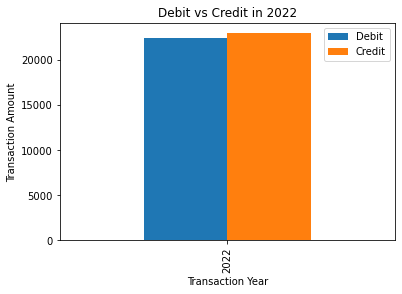

In [117]:
data.groupby('Transaction Year')['Debit','Credit'].sum().plot(kind='bar')
plt.title('Debit vs Credit in 2022')
plt.ylabel('Transaction Amount')
plt.show()

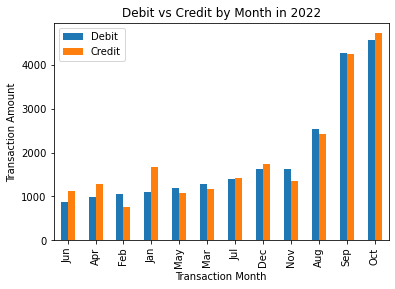

In [118]:
total_by_month = data.groupby('Transaction Month')['Debit','Credit'].sum()
sorted_total= total_by_month.sort_values(by=['Debit'], ascending=True)
sorted_total.plot(kind='bar')
plt.title('Debit vs Credit by Month in 2022')
plt.ylabel('Transaction Amount')
plt.show()

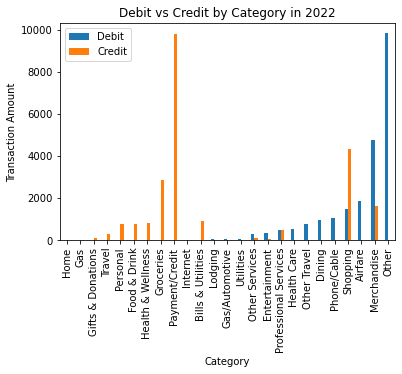

In [119]:
total_by_category = data.groupby('Category')['Debit','Credit'].sum()
sorted_total_c= total_by_category.sort_values(by=['Debit','Credit'], ascending=True)
sorted_total_c.plot(kind='bar')
plt.title('Debit vs Credit by Category in 2022')
plt.ylabel('Transaction Amount')
plt.show()

In [120]:
data['Standard Des'] = data['Description'].str.split('*').str[0]

In [121]:
data['Standard Des'] = data['Standard Des'].str.split(' ').str[0]

In [122]:
data.head()

,Transaction Date,Posted Date,Description,Category,Debit,Credit,Transaction Year,Transaction Month,Posted Year,Posted Month,Standard Des
207,2022-12-21,2022-12-22,Amazon.com*2X8Z358X3,Shopping,0.0,18.61,2022,Dec,2022,Dec,Amazon.com
208,2022-12-21,2022-12-22,FSI*GEORGIA POWER,Bills & Utilities,0.0,72.54,2022,Dec,2022,Dec,FSI
209,2022-12-21,2022-12-22,Amazon.com*NS3YI5VH3,Shopping,0.0,14.73,2022,Dec,2022,Dec,Amazon.com
210,2022-12-13,2022-12-14,TT* GWINNETTCO DEC10,Travel,0.0,2.50,2022,Dec,2022,Dec,TT
211,2022-12-11,2022-12-12,FADO IRISH PUB - MIDTOWN,Food & Drink,0.0,30.11,2022,Dec,2022,Dec,FADO


In [123]:
travel = data[data['Category'].isin(['Airfare','Other Travel'])]
travel

,Transaction Date,Posted Date,Description,Category,Debit,Credit,Transaction Year,Transaction Month,Posted Year,Posted Month,Standard Des
0,2022-05-07,2022-05-07,LYFT *1 RIDE 05-06,Other Travel,63.69,0.0,2022,May,2022,May,LYFT
17,2022-04-10,2022-04-11,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Apr,2022,Apr,MASABI_PAACREADY2RIDE
18,2022-04-10,2022-04-11,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Apr,2022,Apr,MASABI_PAACREADY2RIDE
25,2022-04-09,2022-04-11,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Apr,2022,Apr,MASABI_PAACREADY2RIDE
26,2022-04-09,2022-04-11,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Apr,2022,Apr,MASABI_PAACREADY2RIDE
...,...,...,...,...,...,...,...,...,...,...,...
32,2022-02-16,2022-02-17,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Feb,2022,Feb,MASABI_PAACREADY2RIDE
35,2022-02-14,2022-02-15,PT AUTHY ALLEG TKT VEN,Other Travel,4.00,0.0,2022,Feb,2022,Feb,PT
36,2022-02-14,2022-02-15,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Feb,2022,Feb,MASABI_PAACREADY2RIDE
39,2022-02-13,2022-02-14,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Feb,2022,Feb,MASABI_PAACREADY2RIDE


In [125]:
totals_travel = travel.groupby('Standard Des')['Debit'].sum()
totals_travel

Standard Des
AMERICAN                  50.40
DELTA                    937.00
FSP                       29.36
JETBLUE                  799.82
LYFT                     116.82
MARTA                     18.50
MASABI_PAACREADY2RIDE    340.50
NIAGARACRUISESUSD         62.88
PT                         4.00
TACA                     108.09
UBER                     100.26
gotogate_us_LUICEV        41.33
Name: Debit, dtype: float64

In [126]:
dict_map = {'AMERICAN':'AIR','DELTA':'AIR','JETBLUE':'AIR','TACA':'AIR','gotogate_us_LUCICEV':'AIR','FSP':'GROUND',
           'LYFT':'GROUND','MARTA':'GROUND','MASABI_PAACREADY2RIDE':'GROUND','NIAGARACRUISESUSD':'GROUND',
           'PT':'GROUND','UBER':'GROUND'}

travel['Type of Transportation'] = travel['Standard Des'].map(dict_map)

In [127]:
travel

,Transaction Date,Posted Date,Description,Category,Debit,Credit,Transaction Year,Transaction Month,Posted Year,Posted Month,Standard Des,Type of Transportation
0,2022-05-07,2022-05-07,LYFT *1 RIDE 05-06,Other Travel,63.69,0.0,2022,May,2022,May,LYFT,GROUND
17,2022-04-10,2022-04-11,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Apr,2022,Apr,MASABI_PAACREADY2RIDE,GROUND
18,2022-04-10,2022-04-11,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Apr,2022,Apr,MASABI_PAACREADY2RIDE,GROUND
25,2022-04-09,2022-04-11,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Apr,2022,Apr,MASABI_PAACREADY2RIDE,GROUND
26,2022-04-09,2022-04-11,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Apr,2022,Apr,MASABI_PAACREADY2RIDE,GROUND
...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-02-16,2022-02-17,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Feb,2022,Feb,MASABI_PAACREADY2RIDE,GROUND
35,2022-02-14,2022-02-15,PT AUTHY ALLEG TKT VEN,Other Travel,4.00,0.0,2022,Feb,2022,Feb,PT,GROUND
36,2022-02-14,2022-02-15,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Feb,2022,Feb,MASABI_PAACREADY2RIDE,GROUND
39,2022-02-13,2022-02-14,MASABI_PAACREADY2RIDE,Other Travel,2.75,0.0,2022,Feb,2022,Feb,MASABI_PAACREADY2RIDE,GROUND


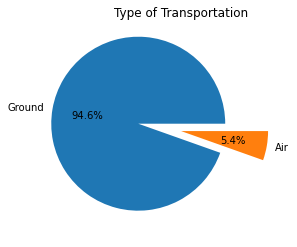

In [134]:
plt.pie(travel['Type of Transportation'].value_counts(), labels=['Ground','Air'],autopct='%.1f%%',
       explode=[0.5,0])
plt.title('Type of Transportation')
plt.show()

In [129]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import sys
from PIL import Image, ImageDraw

In [130]:
text = data['Description'].values

In [131]:
wordcloud = WordCloud().generate(str(text))

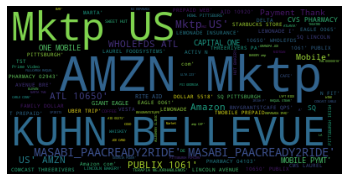

In [132]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()